<a href="https://colab.research.google.com/github/ApoorvaGowda27/Exploratory-data-analysis/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn

# Import libraries
import pandas as pd

# Load the dataset
file_path = '/content/retail_sales_dataset.csv'  # Update with your CSV file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

# Data Cleaning
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Dropping rows with missing values (you may want to handle this differently)
data.dropna(inplace=True)

# Check data types
print(data.dtypes)

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])


Missing values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [ ]:
# Descriptive statistics
desc_stats = data.describe(include='all')
print(desc_stats)

# Additional statistics for numerical columns
mean = data['Total Amount'].mean()
median = data['Total Amount'].median()
mode = data['Total Amount'].mode()[0]
std_dev = data['Total Amount'].std()

print(f"Mean: {mean}, Median: {median}, Mode: {mode}, Standard Deviation: {std_dev}")


        Transaction ID                           Date Customer ID  Gender  \
count      1000.000000                           1000        1000    1000   
unique             NaN                            NaN        1000       2   
top                NaN                            NaN     CUST001  Female   
freq               NaN                            NaN           1     510   
mean        500.500000  2023-07-03 00:25:55.200000256         NaN     NaN   
min           1.000000            2023-01-01 00:00:00         NaN     NaN   
25%         250.750000            2023-04-08 00:00:00         NaN     NaN   
50%         500.500000            2023-06-29 12:00:00         NaN     NaN   
75%         750.250000            2023-10-04 00:00:00         NaN     NaN   
max        1000.000000            2024-01-01 00:00:00         NaN     NaN   
std         288.819436                            NaN         NaN     NaN   

               Age Product Category     Quantity  Price per Unit  Total Amo

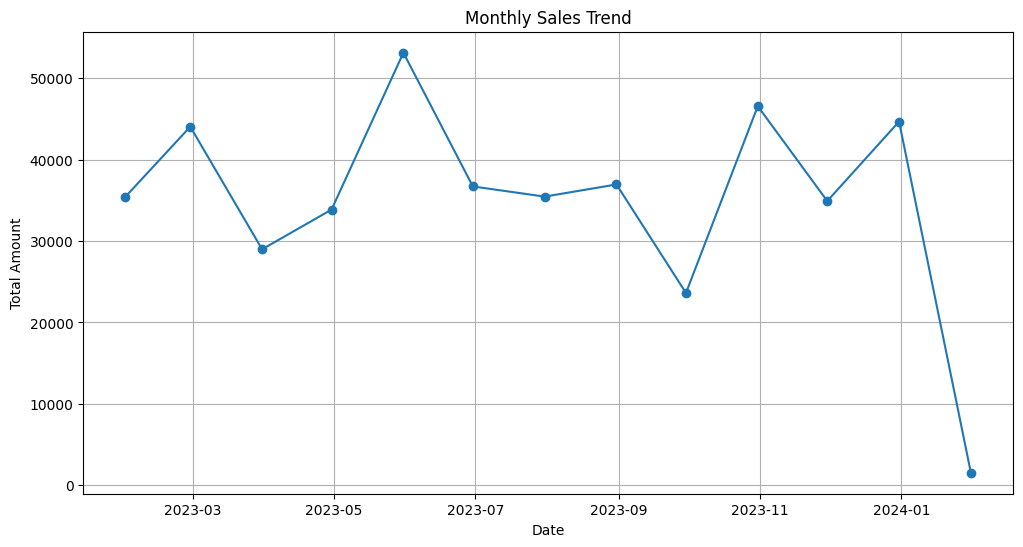

In [ ]:
# Set 'Date' as index
data.set_index('Date', inplace=True)

# Resampling data for monthly sales
monthly_sales = data.resample('M').sum()['Total Amount']

# Plotting monthly sales trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid()
plt.show()


Customer Age Distribution:
 count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64
Sales by Product Category:
 Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


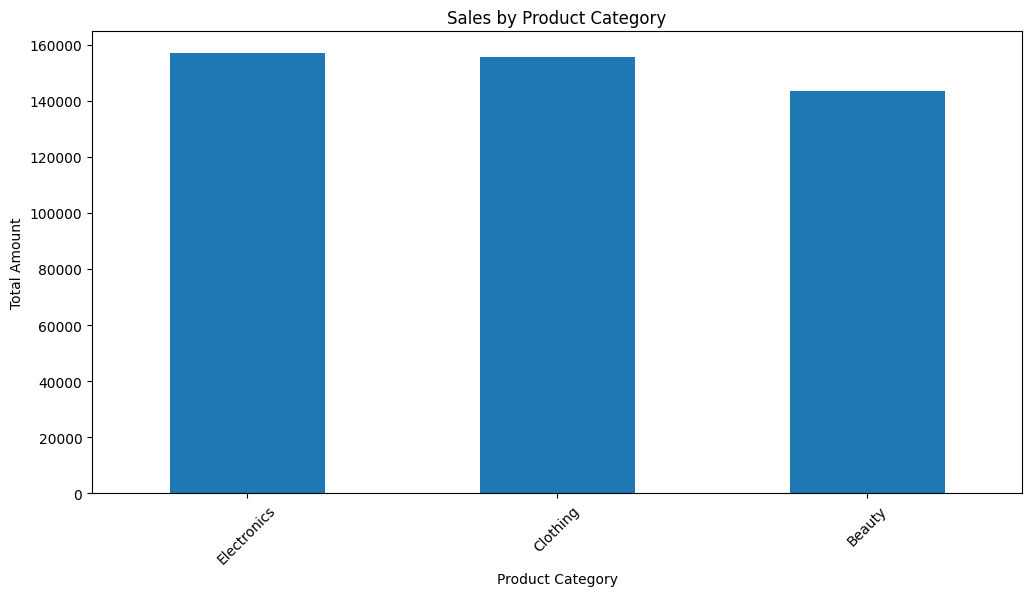

In [ ]:
# Customer Demographics Analysis
customer_age_distribution = data['Age'].describe()
print("Customer Age Distribution:\n", customer_age_distribution)

# Product Category Analysis
product_category_sales = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("Sales by Product Category:\n", product_category_sales)

# Plotting Sales by Product Category
plt.figure(figsize=(12, 6))
product_category_sales.plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()


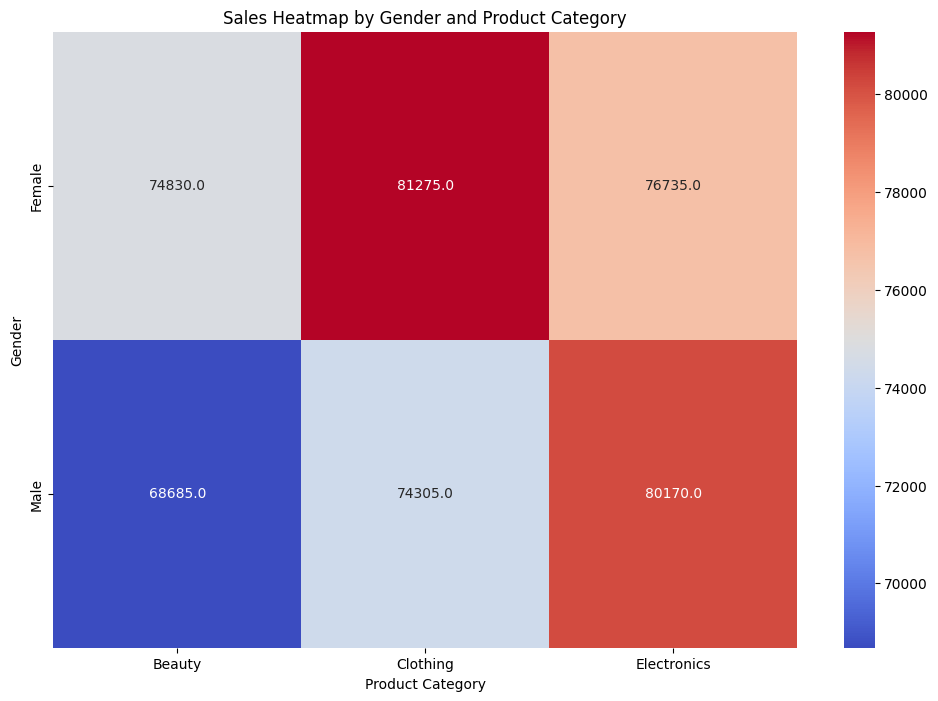

In [ ]:
import seaborn as sns

# Heatmap of sales per customer demographics
heatmap_data = data.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Sales Heatmap by Gender and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.show()


In [ ]:
# Recommendations based on EDA
def provide_recommendations(data):
    recommendations = []

    # If certain products are high in demand
    top_categories = data.groupby('Product Category')['Total Amount'].sum().nlargest(3).index.tolist()
    recommendations.append(f"Focus on promoting these top-selling product categories: {top_categories}.")

    # Calculate average age
    avg_age = data['Age'].mean()
    print(f"Average Age: {avg_age}")

    # If average age is below 30
    if avg_age < 30:
        recommendations.append("Consider targeting younger audiences with marketing strategies.")

    # Analyzing trends
    last_month_sales = monthly_sales.iloc[-1]
    previous_month_sales = monthly_sales.iloc[-2]
    print(f"Last Month Sales: {last_month_sales}, Previous Month Sales: {previous_month_sales}")

    if last_month_sales > previous_month_sales:
        recommendations.append("Sales are increasing. Consider scaling up inventory.")

    return recommendations

recommendations = provide_recommendations(data)

# Check and print recommendations
if recommendations:  # Check if there are any recommendations
    print("Recommendations:")
    for rec in recommendations:
        print(rec)
else:
    print("No specific recommendations available.")

Average Age: 41.392
Last Month Sales: 1530, Previous Month Sales: 44690
Recommendations:
Focus on promoting these top-selling product categories: ['Electronics', 'Clothing', 'Beauty'].
